In [1]:
import pandas as pd

In [4]:
!gdown 1F3SEgp1O7mulQBW4qMn-WIx9mdTcy_jx

Downloading...
From: https://drive.google.com/uc?id=1F3SEgp1O7mulQBW4qMn-WIx9mdTcy_jx
To: /content/cars.csv
100% 145M/145M [00:02<00:00, 60.0MB/s]


Read the data

In [5]:
dataset = pd.read_csv('/content/cars.csv')

In [8]:
dataset

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,Blond,0.0,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,Beige,NaN,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,Soft Beige,0.0,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,Off Black,1.0,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0


In [9]:
dataset['manufacturer'].value_counts()

Ford             79526
Toyota           59535
Chevrolet        56043
Nissan           48529
Jeep             41665
Mercedes-Benz    40824
Honda            37612
BMW              37570
Kia              35063
GMC              29563
Dodge            25250
Subaru           24767
Volkswagen       24620
Hyundai          22203
Lexus            21301
RAM              19364
Audi             17863
Cadillac         17794
Mazda            15485
Buick            14624
Chrysler         12647
INFINITI         12289
Land Rover       12272
Porsche          11461
Lincoln          10608
Volvo            10029
Acura             8489
Tesla             5883
Mitsubishi        5743
Jaguar            3469
Name: manufacturer, dtype: int64

In [10]:
dataset.isna().sum()

manufacturer                0
model                       0
year                        0
mileage                   506
engine                  15050
transmission             9904
drivetrain              21562
fuel_type               22927
mpg                    142071
exterior_color           8859
interior_color          56975
accidents_or_damage     24212
one_owner               31483
personal_use_only       24852
seller_name              8593
seller_rating          213973
driver_rating           31632
driver_reviews_num          0
price_drop             351979
price                       0
dtype: int64

<ipython-input-11-f73720e0b424>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

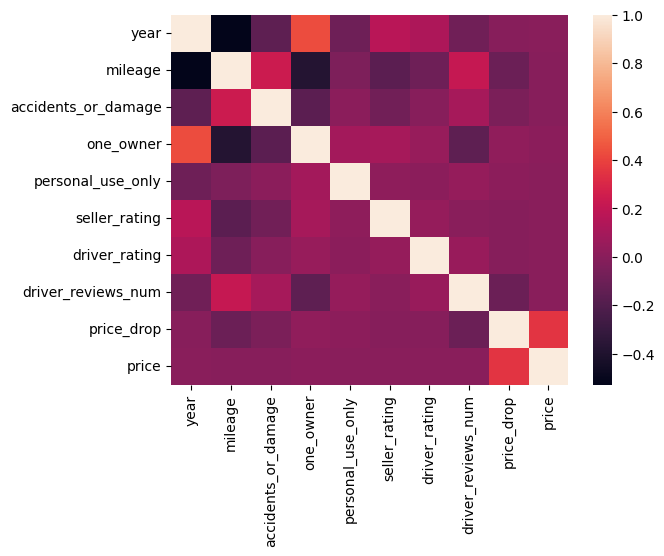

In [11]:
import seaborn as sns
sns.heatmap(dataset.corr())

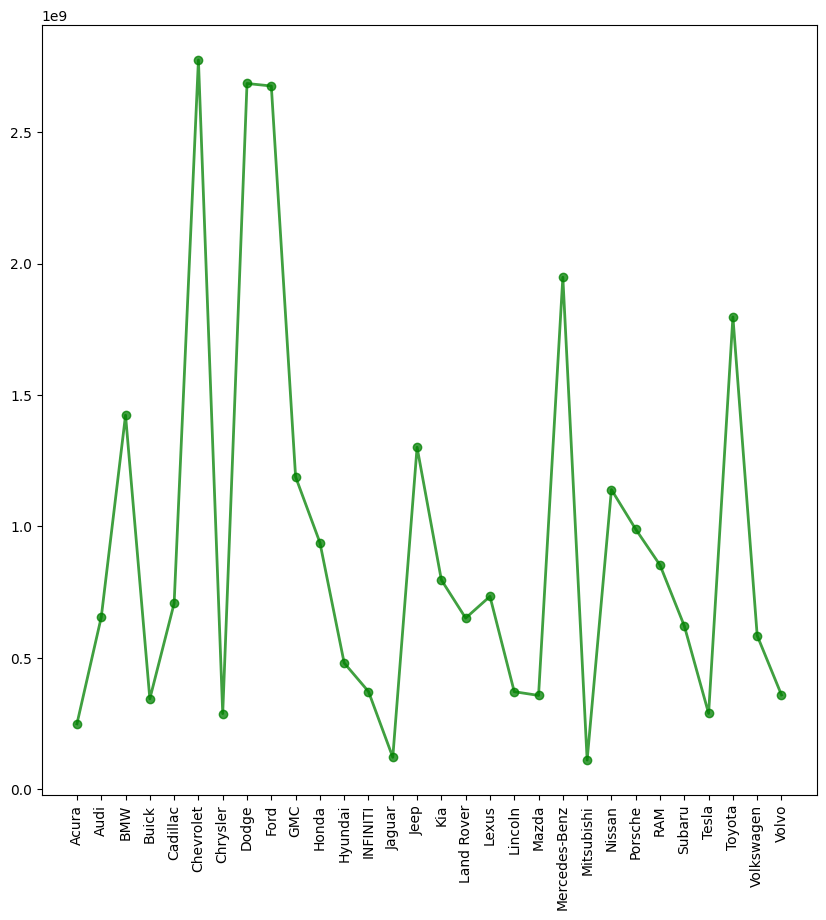

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10, 10])
plt.plot(dataset.groupby('manufacturer').price.sum(), '-og', linewidth='2', alpha=0.75)
plt.xticks(rotation=90)
plt.show()

In [13]:
from sklearn.impute import KNNImputer

In [14]:
imputer = KNNImputer(n_neighbors=3)

In [15]:
from sklearn.preprocessing import LabelEncoder


Encode categorical variables


In [16]:
for column in dataset.columns:
  if dataset[column].dtype == "object":
    encoder = LabelEncoder()
    dataset[column] = encoder.fit_transform(dataset[column])

In [17]:
dataset.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,0,5293,2013,92945.0,106,864,26,19,727,739,3615,0.0,0.0,0.0,8393,NaN,4.4,12.0,300.0,13988.0
1,0,5293,2013,47645.0,126,882,26,22,727,3110,1921,1.0,1.0,1.0,9267,NaN,4.4,12.0,NaN,17995.0
2,0,5293,2013,53422.0,126,882,26,22,727,689,1921,0.0,1.0,1.0,17713,4.3,4.4,12.0,500.0,17000.0
3,0,5293,2013,117598.0,126,882,26,22,727,5251,4679,0.0,1.0,1.0,666,NaN,4.4,12.0,675.0,14958.0
4,0,5293,2013,114865.0,126,882,26,22,727,7681,1921,1.0,0.0,1.0,7723,3.7,4.4,12.0,300.0,14498.0


Imputing missing values


In [18]:
import numpy as np
from sklearn.impute import SimpleImputer
def impute(strategy,X_train,X_test):
  imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)

  X_train = imputer.fit_transform(X_train)
  X_test = imputer.transform(X_test)
  return X_train,X_test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM

Prediction function


In [61]:
def predict_regression(dataset,model,strategy,scaler=None):
    X = dataset.drop(['price'],axis=1)
    Y = dataset['price']
    X_train, X_test, Y_train, Y_test = train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.25)

    X_train,X_test = impute(strategy,X_train,X_test)

    if scaler:
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.fit_transform(X_test)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    return Y_test,y_pred



Define different models


In [36]:
linear_regressor = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
xgb_regressor = XGBRegressor(objective ='reg:squarederror',learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)


In [37]:
neural_network = Sequential()

neural_network.add(Dense(32, input_dim=19, kernel_initializer='uniform', activation='relu'))

#Note: We then add the hidden layers to the model.
#Note: The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.
#Note: It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.
neural_network.add(Dense(16, kernel_initializer='uniform', activation='relu'))
neural_network.add(Dense(16, kernel_initializer='uniform', activation='relu'))

#Note: We finally add the output layer. The value 1 signifies that we expect 1 output. We often use sigmoid activation when classifing.
neural_network.add(Dense(1, kernel_initializer='uniform', activation='linear'))

In [38]:
neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [39]:
from sklearn.metrics import mean_squared_error

Return mse for each model

In [63]:
def predict_final(models,strategies,scaler):
  model_names = ['linear regressor', 'lasso regressor', 'ridge regressor', 'xgb regressor', 'neural network']
  errors = {}
  for strategy in strategies:
    print('Imputation strategy: {}'.format(strategy))
    counter = 0
    for model in models:
      if scaler == None:
        y_test,y_predicted = predict_regression(dataset,model,strategy)
      else:
        y_test,y_predicted = predict_regression(dataset,model,strategy,scaler)

      mse = mean_squared_error(y_test, y_predicted)
      print("Model {} has a mse of {}".format(model_names[counter],mse))
      errors["Model {} with imputation strategy {}".format(model_names[counter],strategy)] = mse
      counter+=1
  return errors

In [47]:
models = (linear_regressor,lasso,ridge,xgb_regressor,neural_network)
strategies = ('mean','median','most_frequent')
errors = predict_final(models,strategies,dataset)

Imputation strategy: mean
Model linear regressor has a mse of 5249232743981.698
Model lasso regressor has a mse of 5249025181027.037
Model ridge regressor has a mse of 5248612367436.174
Model xgb regressor has a mse of 24502276448.756905
5954/5954 [==============================] - 8s 1ms/step
Model neural network has a mse of 5250571665316.211
Imputation strategy: median
Model linear regressor has a mse of 628610907.501379
Model lasso regressor has a mse of 5249240219102.713
Model ridge regressor has a mse of 5248638540675.607
Model xgb regressor has a mse of 24550139135.91675
5954/5954 [==============================] - 9s 1ms/step
Model neural network has a mse of 5250541965142.35
Imputation strategy: most_frequent
Model linear regressor has a mse of 5248858888507.332
Model lasso regressor has a mse of 623010526.914879
Model ridge regressor has a mse of 5248605270124.742
Model xgb regressor has a mse of 10539619670466.35
5954/5954 [==============================] - 9s 1ms/step
Model

In [49]:
import sys
def get_best_mse(errors):
  model = ''
  best_mse = sys.maxsize
  for key, value in errors.items():
    if value < best_mse:
      model = key
      best_mse = value
  return model,best_mse

Find best model for regular values


In [52]:
best_model, best_mse = get_best_mse(errors)
print('Best model: {}, with a mse of: {}'.format(best_model,best_mse))

Best model: Model lasso regressor with imputation strategy most_frequent, with a mse of: 623010526.914879


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Predict with scaled data


In [64]:
errors = predict_final(models,strategies,scaler)

Imputation strategy: mean
Model linear regressor has a mse of 5248700350646.912
Model lasso regressor has a mse of 628381157.301362
Model ridge regressor has a mse of 10496987683837.865
Model xgb regressor has a mse of 5327123530347.435
5954/5954 [==============================] - 9s 1ms/step
Model neural network has a mse of 1781766542.9383254
Imputation strategy: median
Model linear regressor has a mse of 5248837370788.9
Model lasso regressor has a mse of 5248952938668.407
Model ridge regressor has a mse of 5248708419444.79
Model xgb regressor has a mse of 4914081147411.833
5954/5954 [==============================] - 9s 1ms/step
Model neural network has a mse of 1577855252.3370216
Imputation strategy: most_frequent
Model linear regressor has a mse of 980981611.9039057
Model lasso regressor has a mse of 5248948234212.681
Model ridge regressor has a mse of 829698807.9948661
Model xgb regressor has a mse of 12945610511146.422
5954/5954 [==============================] - 9s 2ms/step
Mod

Find best model for scaled values


In [65]:
best_model, best_mse = get_best_mse(errors)
print('Best model with scaled data: {}, with a mse of: {}'.format(best_model,best_mse))

Best model with scaled data: Model lasso regressor with imputation strategy mean, with a mse of: 628381157.301362
